# English Premier League 2022/2023 Table

# Introduction

The English Premier League is the highest level of the English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches against all other teams both home and away

# Aim of the Project

The aim of this project is to analyze the 2022/2023 Premier League Table. in a way that even someone who is not familiar with how football (premier league) works can understand. 
The dataset for this project was scrapped from the skysport website and the insights we are looking forward to derive from this analysis are

- To know the position of each team


- To Know how many matches each team won


- To Know how many matches each team lost


- To Know how many matches each team draw


- To Know which team qualified for champtions league, Europa League, Conference League


- To Know which team will be religating 


- To Know how many goals each team scored


- To Know how many goals each team conceded (Goal Against) 


In [1]:
# loading EDA packaes
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# loading web scrapping packages
import requests
from bs4 import BeautifulSoup
import openpyxl

# to bypass warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
#extract the webpage content and creating BeautifulSoup object
url="https://www.skysports.com/premier-league-table/2022"
r=requests.get(url)
# print(r)

soup = BeautifulSoup(r.text,'lxml')

In [3]:
soup

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<title>Premier League Table &amp; Standings - Sky Sports Football</title>
<meta content="INDEX,FOLLOW,max-snippet:-1,max-image-preview:large,max-video-preview:-1" name="robots"/>
<meta content="Complete table of Premier League standings for the 2022/2023 Season, plus access to tables from past seasons and other Football leagues." name="description"/>
<meta content="Sky, Sports, Football, News, Premier, League, Fixtures, Results, Tables, Photos, Transfer, Centre, Arsenal, Aston Villa, Birmingham City, Blackburn Rovers, Bolton Wanderers, Burnley, Chelsea, Everton, Fulham, Hull City, Liverpool, Manchester City, Man City, Manchester United, Man Utd, Portsmouth, Stoke City, Sunderland, Tottenham Hotspur, Spurs, West Ham, Wigan Athletic, Wolverhampton Wanderers, Wolves, watch, video, live, pc. torress, benitez" name="keywords"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//e0.365dm.

In [4]:
#Extracting the table
table=soup.find('table', class_="standing-table__table")
print(table)

<table class="standing-table__table callfn" data-fn="table-sorter-lite" data-lite="true">
<caption class="standing-table__caption">
    Premier League 2022/23  </caption>
<colgroup class="standing-table__cols">
<col class="standing-table__cell standing-table__col1"/>
<col class="standing-table__cell standing-table__col2 standing-table__cell--name"/>
<col class="standing-table__cell standing-table__col3"/>
<col class="standing-table__cell standing-table__col4 is-hidden--bp35"/>
<col class="standing-table__cell standing-table__col5 is-hidden--bp35"/>
<col class="standing-table__cell standing-table__col6 is-hidden--bp35"/>
<col class="standing-table__cell standing-table__col7 is-hidden--bp35"/>
<col class="standing-table__cell standing-table__col8 is-hidden--bp35"/>
<col class="standing-table__cell standing-table__col9"/>
<col class="standing-table__cell standing-table__col10"/>
<col class="standing-table__cell standing-table__col11 is-hidden--bp15 is-hidden--bp35 is-hidden"/>
</colgroup>

In [5]:
#Extracting the column names
colname = table.find_all('th')
print(colname)

[<th class="standing-table__cell standing-table__header-cell" data-index="0" data-label="pos" title="Position">#</th>, <th class="standing-table__cell standing-table__header-cell standing-table__cell--name" data-index="1" title="Team">Team</th>, <th class="standing-table__cell standing-table__header-cell" data-index="2" data-label="pld" title="Played">Pl</th>, <th class="standing-table__cell standing-table__header-cell is-hidden--bp35" data-index="3" data-label="w" title="Won">W</th>, <th class="standing-table__cell standing-table__header-cell is-hidden--bp35" data-index="4" data-label="d">D</th>, <th class="standing-table__cell standing-table__header-cell is-hidden--bp35" data-index="5" data-label="l">L</th>, <th class="standing-table__cell standing-table__header-cell is-hidden--bp35" data-index="6" data-label="f">F</th>, <th class="standing-table__cell standing-table__header-cell is-hidden--bp35" data-index="7" data-label="a">A</th>, <th class="standing-table__cell standing-table__he

In [7]:
#extracting all the column name data
columnnames=[]
for i in colname:
    columnname=i.text
    columnnames.append(columnname)

print(columnnames)

['#', 'Team', 'Pl', 'W', 'D', 'L', 'F', 'A', 'GD', 'Pts', 'Last 6']


In [8]:
#creating a dataframe
leaugetable= pd.DataFrame(columns=columnnames)
print(leaugetable)

Empty DataFrame
Columns: [#, Team, Pl, W, D, L, F, A, GD, Pts, Last 6]
Index: []


In [9]:
#extracting the rows in the table
rows=table.find_all("tr")
#print(rows)

In [11]:
#extracting the rows in the table
for i in rows[1:]:
    print(i.text)


1

Manchester City

38
28
5
5
94
33
61
89




2

Arsenal

38
26
6
6
88
43
45
84




3

Manchester United

38
23
6
9
58
43
15
75




4

Newcastle United

38
19
14
5
68
33
35
71




5

Liverpool

38
19
10
9
75
47
28
67




6

Brighton and Hove Albion

38
18
8
12
72
53
19
62




7

Aston Villa

38
18
7
13
51
46
5
61




8

Tottenham Hotspur

38
18
6
14
70
63
7
60




9

Brentford

38
15
14
9
58
46
12
59




10

Fulham

38
15
7
16
55
53
2
52




11

Crystal Palace

38
11
12
15
40
49
-9
45




12

Chelsea

38
11
11
16
38
47
-9
44




13

Wolverhampton Wanderers

38
11
8
19
31
58
-27
41




14

West Ham United

38
11
7
20
42
55
-13
40




15

Bournemouth

38
11
6
21
37
71
-34
39




16

Nottingham Forest

38
9
11
18
38
68
-30
38




17

Everton

38
8
12
18
34
57
-23
36




18

Leicester City

38
9
7
22
51
68
-17
34




19

Leeds United

38
7
10
21
48
78
-30
31




20

Southampton

38
6
7
25
36
73
-37
25





In [12]:
#creating a list for the extracted data
for i in rows[1:]:
    data= i.find_all("td")
    row = [tr.text for tr in data]
    print(row)

['1', '\nManchester City\n', '38', '28', '5', '5', '94', '33', '61', '89', '\n']
['2', '\nArsenal\n', '38', '26', '6', '6', '88', '43', '45', '84', '\n']
['3', '\nManchester United\n', '38', '23', '6', '9', '58', '43', '15', '75', '\n']
['4', '\nNewcastle United\n', '38', '19', '14', '5', '68', '33', '35', '71', '\n']
['5', '\nLiverpool\n', '38', '19', '10', '9', '75', '47', '28', '67', '\n']
['6', '\nBrighton and Hove Albion\n', '38', '18', '8', '12', '72', '53', '19', '62', '\n']
['7', '\nAston Villa\n', '38', '18', '7', '13', '51', '46', '5', '61', '\n']
['8', '\nTottenham Hotspur\n', '38', '18', '6', '14', '70', '63', '7', '60', '\n']
['9', '\nBrentford\n', '38', '15', '14', '9', '58', '46', '12', '59', '\n']
['10', '\nFulham\n', '38', '15', '7', '16', '55', '53', '2', '52', '\n']
['11', '\nCrystal Palace\n', '38', '11', '12', '15', '40', '49', '-9', '45', '\n']
['12', '\nChelsea\n', '38', '11', '11', '16', '38', '47', '-9', '44', '\n']
['13', '\nWolverhampton Wanderers\n', '38', '

In [13]:
#removing the \n \n  in the data
import re
for i in rows[1:]:
    data= i.find_all("td")
    row = [tr.text.strip('\n \n') for tr in data]
    print(row)

['1', 'Manchester City', '38', '28', '5', '5', '94', '33', '61', '89', '']
['2', 'Arsenal', '38', '26', '6', '6', '88', '43', '45', '84', '']
['3', 'Manchester United', '38', '23', '6', '9', '58', '43', '15', '75', '']
['4', 'Newcastle United', '38', '19', '14', '5', '68', '33', '35', '71', '']
['5', 'Liverpool', '38', '19', '10', '9', '75', '47', '28', '67', '']
['6', 'Brighton and Hove Albion', '38', '18', '8', '12', '72', '53', '19', '62', '']
['7', 'Aston Villa', '38', '18', '7', '13', '51', '46', '5', '61', '']
['8', 'Tottenham Hotspur', '38', '18', '6', '14', '70', '63', '7', '60', '']
['9', 'Brentford', '38', '15', '14', '9', '58', '46', '12', '59', '']
['10', 'Fulham', '38', '15', '7', '16', '55', '53', '2', '52', '']
['11', 'Crystal Palace', '38', '11', '12', '15', '40', '49', '-9', '45', '']
['12', 'Chelsea', '38', '11', '11', '16', '38', '47', '-9', '44', '']
['13', 'Wolverhampton Wanderers', '38', '11', '8', '19', '31', '58', '-27', '41', '']
['14', 'West Ham United', '38',

In [16]:
#adding the rows to dataframe

rows =table.find_all("tr")

for i in rows[1:]:
    data= i.find_all("td")
    row = [tr.text.strip('\n \n') for tr in data]
    l=len(leaugetable)
    leaugetable.loc[l] = row
    leaugetable=pd.DataFrame(leaugetable)

In [17]:
#print the data
leaugetable

,#,Team,Pl,W,D,L,F,A,GD,Pts,Last 6
0,1,Manchester City,38,28,5,5,94,33,61,89,
1,2,Arsenal,38,26,6,6,88,43,45,84,
2,3,Manchester United,38,23,6,9,58,43,15,75,
3,4,Newcastle United,38,19,14,5,68,33,35,71,
4,5,Liverpool,38,19,10,9,75,47,28,67,
5,6,Brighton and Hove Albion,38,18,8,12,72,53,19,62,
6,7,Aston Villa,38,18,7,13,51,46,5,61,
7,8,Tottenham Hotspur,38,18,6,14,70,63,7,60,
8,9,Brentford,38,15,14,9,58,46,12,59,
9,10,Fulham,38,15,7,16,55,53,2,52,


### Saving the extracted data to csv.
### I will continue with the Analysis and data cleaning in the next line. This is so that i won't keep scrapping the data from skysport whenever i want to rerun the whole body of code for uniformity, also i want to respect the ethics of web scrapping.

In [19]:
#saving the extracted data to csv.
leaugetable.to_csv('premierleague.csv')

In [21]:
#loaing the scraped data for furthre cleaning and analysis
league_table=pd.read_csv(r"C:\Users\chine\premierleague.csv")
league_table

,Unnamed: 0,#,Team,Pl,W,D,L,F,A,GD,Pts,Last 6
0,0,1,Manchester City,38,28,5,5,94,33,61,89,NaN
1,1,2,Arsenal,38,26,6,6,88,43,45,84,NaN
2,2,3,Manchester United,38,23,6,9,58,43,15,75,NaN
3,3,4,Newcastle United,38,19,14,5,68,33,35,71,NaN
4,4,5,Liverpool,38,19,10,9,75,47,28,67,NaN
5,5,6,Brighton and Hove Albion,38,18,8,12,72,53,19,62,NaN
6,6,7,Aston Villa,38,18,7,13,51,46,5,61,NaN
7,7,8,Tottenham Hotspur,38,18,6,14,70,63,7,60,NaN
8,8,9,Brentford,38,15,14,9,58,46,12,59,NaN
9,9,10,Fulham,38,15,7,16,55,53,2,52,NaN


# Cleaning the Data

In [22]:
# before we start cleaning our data, we make a copy of the original data
league_table = league_table.copy()

Delete the column named 'Unnamed: 0'

In [23]:
# deleting the unwanted column
del league_table['Unnamed: 0']

The Last 6 Column has Missing values the last 6 means the results of the last 6 matched played by each team. apparenty i wont be needid the data so i will drop column from the dataframe

In [24]:
league_table=league_table.drop ('Last 6', axis = 1)

The column names were abbrevaited so to get a clearer understanding i have to rename the column names

In [25]:
#Renaming the column names for better understanding
league_tablenewcolumn=['Position', 'Team_Name', 'Played', 'Won', 'Draw', 'Lost', 'Goal_For', 'Goal_Against', 
                       'Goal_Difference', 'Points']

league_table.columns = league_tablenewcolumn

In [26]:
league_table.style.hide_index()

Position,Team_Name,Played,Won,Draw,Lost,Goal_For,Goal_Against,Goal_Difference,Points
1,Manchester City,38,28,5,5,94,33,61,89
2,Arsenal,38,26,6,6,88,43,45,84
3,Manchester United,38,23,6,9,58,43,15,75
4,Newcastle United,38,19,14,5,68,33,35,71
5,Liverpool,38,19,10,9,75,47,28,67
6,Brighton and Hove Albion,38,18,8,12,72,53,19,62
7,Aston Villa,38,18,7,13,51,46,5,61
8,Tottenham Hotspur,38,18,6,14,70,63,7,60
9,Brentford,38,15,14,9,58,46,12,59
10,Fulham,38,15,7,16,55,53,2,52


In [27]:
league_table.shape

(20, 10)

This might be a small data set but my eyes might not capture everything so i will check for null values

In [28]:
#Checking for null values
league_table.isnull().sum()

Position           0
Team_Name          0
Played             0
Won                0
Draw               0
Lost               0
Goal_For           0
Goal_Against       0
Goal_Difference    0
Points             0
dtype: int64

In [29]:
#checking for duplicate
league_table.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [30]:
#Checking the data types
league_table.dtypes

Position            int64
Team_Name          object
Played              int64
Won                 int64
Draw                int64
Lost                int64
Goal_For            int64
Goal_Against        int64
Goal_Difference     int64
Points              int64
dtype: object

## Exploratory Data Analysis

In [31]:
league_table.corr()

,Position,Played,Won,Draw,Lost,Goal_For,Goal_Against,Goal_Difference,Points
Position,1.000000,NaN,-0.963627,0.148714,0.944758,-0.816774,0.860682,-0.934391,-0.979879
Played,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Won,-0.963627,NaN,1.000000,-0.332546,-0.896816,0.883614,-0.773371,0.938565,0.989318
Draw,0.148714,NaN,-0.332546,1.000000,-0.118993,-0.259823,-0.146228,-0.104751,-0.191516
Lost,0.944758,NaN,-0.896816,-0.118993,1.000000,-0.808397,0.882812,-0.938995,-0.951727
Goal_For,-0.816774,NaN,0.883614,-0.259823,-0.808397,1.000000,-0.582490,0.928028,0.879433
Goal_Against,0.860682,NaN,-0.773371,-0.146228,0.882812,-0.582490,1.000000,-0.843357,-0.827466
Goal_Difference,-0.934391,NaN,0.938565,-0.104751,-0.938995,0.928028,-0.843357,1.000000,0.960592
Points,-0.979879,NaN,0.989318,-0.191516,-0.951727,0.879433,-0.827466,0.960592,1.000000


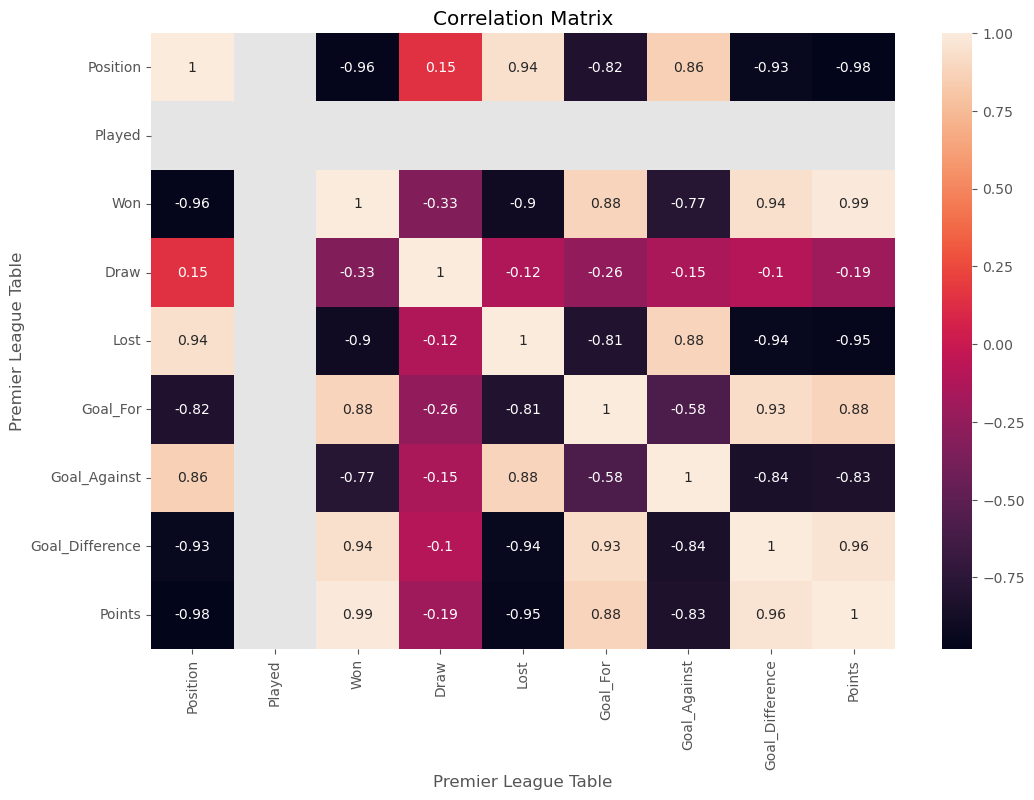

In [32]:
correlation_matrix=league_table.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Premier League Table')
plt.ylabel('Premier League Table')
plt.show()

### Table Showing Total Number of Matches Won, Lost, Draw By Each Team

In [33]:
league_table.loc[:, ['Team_Name', 'Position', 'Won', 'Lost', "Draw"]].style.hide_index()

Team_Name,Position,Won,Lost,Draw
Manchester City,1,28,5,5
Arsenal,2,26,6,6
Manchester United,3,23,9,6
Newcastle United,4,19,5,14
Liverpool,5,19,9,10
Brighton and Hove Albion,6,18,12,8
Aston Villa,7,18,13,7
Tottenham Hotspur,8,18,14,6
Brentford,9,15,9,14
Fulham,10,15,16,7


## Total Number of Matches Won By Each Team

Each Team played 38 matches below is a breakdown of how many matches was won by each team

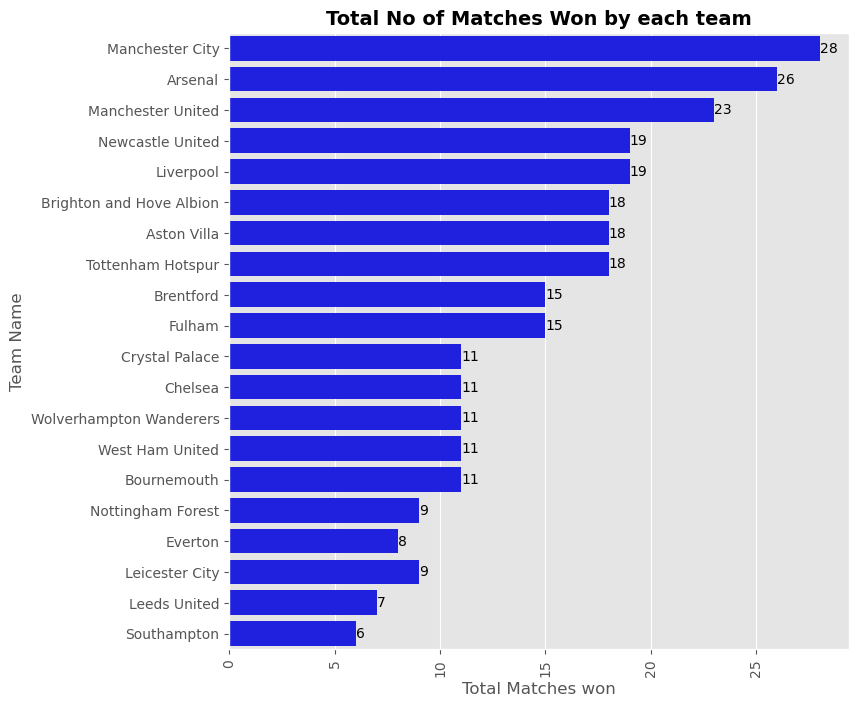

In [34]:
#bar chart showing total no of matches won by each team
plt.figure(figsize=[8, 8])
plt.xticks(rotation = 90)
ax = sns.barplot(
    data = league_table,
    y = 'Team_Name',
    x = 'Won',
     color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total Matches won', fontsize=12)
plt.ylabel('Team Name', fontsize=12)

plt.title("Total No of Matches Won by each team", weight='bold', fontsize = 14)
plt.show()

## Total Number of Matches Lost By Each Team

Each Team played 38 matches below is a breakdown of how many matches was lost by each team

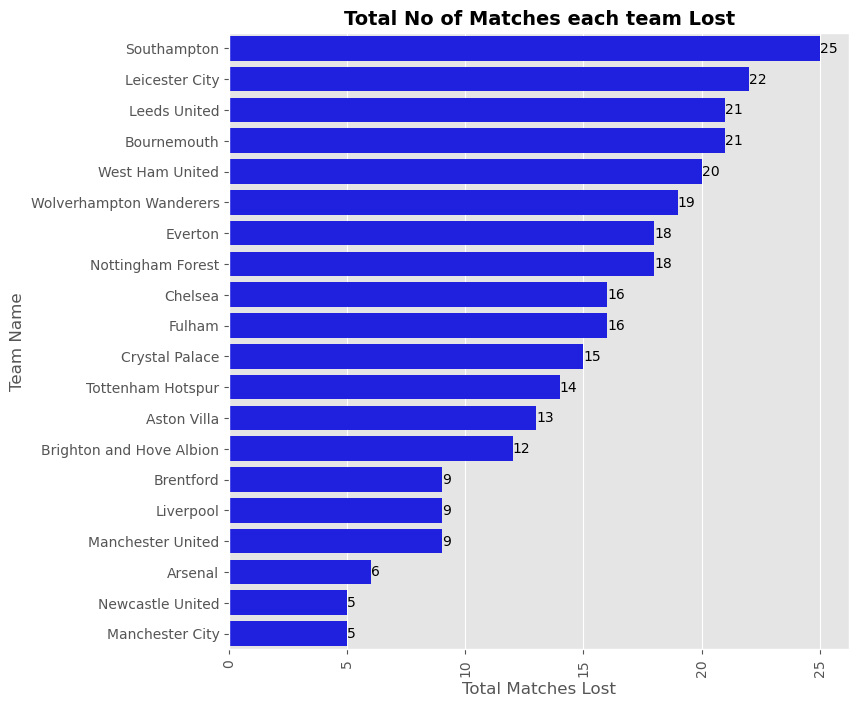

In [35]:
#bar chart showing total no of matches lost by each team
plt.figure(figsize=[8, 8])
plt.xticks(rotation = 90)
ax = sns.barplot(
    data = league_table.sort_values(by = ['Lost'], ascending=False),
    y = 'Team_Name',
    x = 'Lost',
     color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total Matches Lost', fontsize=12)
plt.ylabel('Team Name', fontsize=12)

plt.title("Total No of Matches each team Lost", weight='bold', fontsize = 14)
plt.show()

## Total Number of Draw By Each Team

Each Team played 38 matches below is a breakdown of how many matches that ended draw by each team

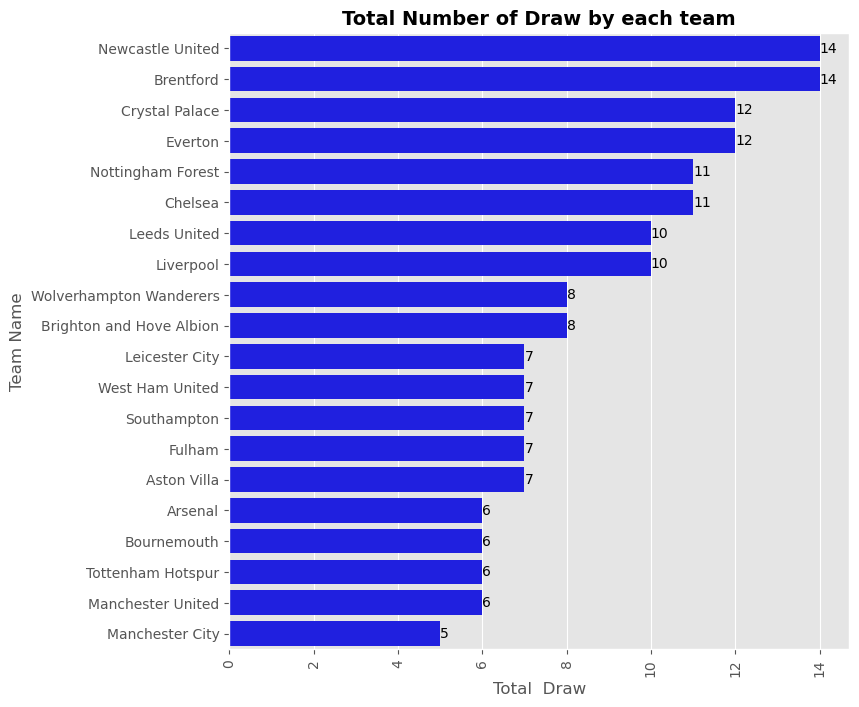

In [37]:
#bar chart showing total no of matches ended draw
plt.figure(figsize=[8, 8])
plt.xticks(rotation = 90)
ax = sns.barplot(
    data = league_table.sort_values(by = ['Draw'], ascending=False),
    y = 'Team_Name',
    x = 'Draw',
     color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Total  Draw', fontsize=12)
plt.ylabel('Team Name', fontsize=12)

plt.title("Total Number of Draw by each team", weight='bold', fontsize = 14)
plt.show()

### Categorizing  the team by the event(cup, competion) they qualify for based on their position

The top 4 team qualfies for champions league

In [38]:
# Top 4 team 
league_table.loc[:3, ['Team_Name', 'Position']].style.hide_index()

Team_Name,Position
Manchester City,1
Arsenal,2
Manchester United,3
Newcastle United,4


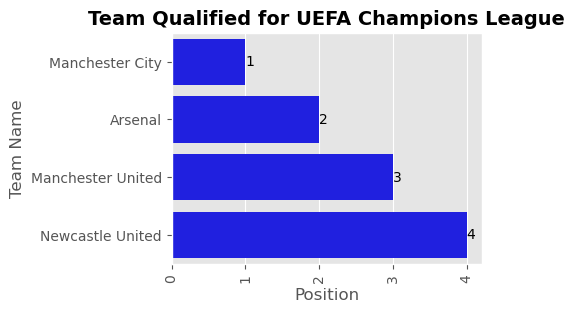

In [39]:
plt.figure(figsize=[4, 3])
plt.xticks(rotation = 90)
ax = sns.barplot(
#     data = league_table,
    #data = league_table.Team_Name.head(4),
    data = league_table.loc[:3, ['Team_Name', 'Position']],
#     league_table.Team_Name.head(4).reset_index(),
    #data = best_sellers.author.value_counts().head(10).reset_index(),
    y = 'Team_Name',
    x = 'Position',
     color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Position', fontsize=12)
plt.ylabel('Team Name', fontsize=12)

plt.title("Team Qualified for UEFA Champions League", weight='bold', fontsize = 14)
plt.show()

In [40]:
# Team that qualifed for Europa League
league_table.loc[4:4, ['Team_Name', 'Position']].style.hide_index()

Team_Name,Position
Liverpool,5


In [41]:
# Team that qualifed for Conference League
league_table.loc[5:5, ['Team_Name', 'Position']].style.hide_index()

Team_Name,Position
Brighton and Hove Albion,6


In [42]:
# Teams that will religate
league_table.loc[17:19, ['Team_Name', 'Position']].style.hide_index()

Team_Name,Position
Leicester City,18
Leeds United,19
Southampton,20


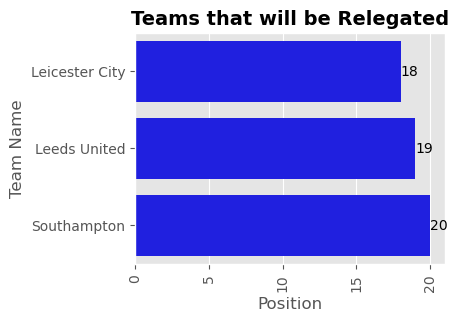

In [43]:
plt.figure(figsize=[4, 3])
plt.xticks(rotation = 90)
ax = sns.barplot(
    data = league_table.loc[17:, ['Team_Name', 'Position']],
    y = 'Team_Name',
    x = 'Position',
     color='b'
)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Position', fontsize=12)
plt.ylabel('Team Name', fontsize=12)

plt.title("Teams that will be Relegated", weight='bold', fontsize = 14)
plt.show()

In [ ]:
#if statement showing the competition a team will play by its position
Position = int(input('Position '))

if Position <=4:
    print("The team will play champions league")
elif Position ==5:
    print('The team will  play Europa league')
elif Position ==6:
    print('The team will  play conference league')
elif (Position >6)  and (Position<=15):
    print('The team will remain in premier league')
elif Position >=16: 
    print('The team will religate')